<a href="https://colab.research.google.com/github/RAIHANRABBY/A-Machine-Learning/blob/main/diabetes_and_hypertension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Reading all the data files

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BDHS/BDHS_DATA/HTN_DM_filtered data_excel.xlsx')

### reading the sata file 

In [ ]:
pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 21.9 MB/s 


In [ ]:
import pyreadstat

In [ ]:
dtafile = '/content/drive/MyDrive/Colab Notebooks/BDHS/BDHS_DATA/HTN_DM_filtered data_Stata file.DTA'
stata, meta = pyreadstat.read_dta(dtafile)

In [ ]:
stata.head()

,hv005,hv021,hv023,division,residence,wealth_index,hv105,hv115,sex,education,...,systolic_average,diastolic_average,hypertension,BMI,BMI_cat,diabetes_measure,diabetes,marital_status,age_cat,occupation
0,671011,1,3,1,2,1,25,1,1,1,...,110.5,58.0,0.0,20.549999,2.0,6.2,0.0,2,1,3
1,671011,1,3,1,2,1,34,1,2,0,...,100.5,66.5,0.0,24.809999,3.0,6.6,1.0,2,1,0
2,671011,1,3,1,2,1,35,1,2,1,...,100.0,65.5,0.0,17.440001,1.0,6.0,0.0,2,2,0
3,671011,1,3,1,2,1,55,1,1,1,...,105.0,71.0,0.0,21.080000,2.0,6.5,0.0,2,6,1
4,671011,1,3,1,2,1,45,1,2,1,...,143.5,93.5,1.0,24.549999,3.0,5.6,0.0,2,4,2


In [ ]:
stata.shape

(12099, 31)

In [ ]:
stata.columns

Index(['hv005', 'hv021', 'hv023', 'division', 'residence', 'wealth_index',
       'hv105', 'hv115', 'sex', 'education', 'sb307', 'sb308',
       'current_smoking', 'sb323a', 'sb323b', 'sb332a', 'sb332b', 'sb335b',
       'sbbm', 'sb3mos', 'swt', 'systolic_average', 'diastolic_average',
       'hypertension', 'BMI', 'BMI_cat', 'diabetes_measure', 'diabetes',
       'marital_status', 'age_cat', 'occupation'],
      dtype='object')

In [ ]:
stata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12099 entries, 0 to 12098
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hv005              12099 non-null  int64  
 1   hv021              12099 non-null  int64  
 2   hv023              12099 non-null  int64  
 3   division           12099 non-null  int64  
 4   residence          12099 non-null  int64  
 5   wealth_index       12099 non-null  int64  
 6   hv105              12099 non-null  int64  
 7   hv115              12099 non-null  int64  
 8   sex                12099 non-null  int64  
 9   education          12099 non-null  int64  
 10  sb307              12099 non-null  int64  
 11  sb308              12067 non-null  object 
 12  current_smoking    12095 non-null  object 
 13  sb323a             12099 non-null  int64  
 14  sb323b             12099 non-null  int64  
 15  sb332a             12099 non-null  int64  
 16  sb332b             120

### read the spss file (Original file_SPSS)

In [ ]:
spss=pd.read_spss('/content/drive/MyDrive/Colab Notebooks/BDHS/BDHS_DATA/Original file_SPSS.SAV')

In [ ]:
spss.head()

,HHID,HVIDX,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,...,SBBM,SBRI,SBCMC,SBFLG,SBRESI,SBED1,SBED2,SBED3,SB3PRG,SB3MOS
0,1 4,1.0,BD7,1.0,4.0,2.0,1.0,671011.0,11.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 4,2.0,BD7,1.0,4.0,2.0,1.0,671011.0,11.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 4,3.0,BD7,1.0,4.0,2.0,1.0,671011.0,11.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 4,4.0,BD7,1.0,4.0,2.0,1.0,671011.0,11.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 4,5.0,BD7,1.0,4.0,2.0,1.0,671011.0,11.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
spss.shape

(89819, 422)

In [ ]:
print(spss.isnull().sum())

HHID          0
HVIDX         0
HV000         0
HV001         0
HV002         0
          ...  
SBED1     75113
SBED2     78704
SBED3     75113
SB3PRG    81804
SB3MOS    89529
Length: 422, dtype: int64


### viewing the excel data

In [ ]:
df.head()

,hv005,hv021,hv023,division,residence,wealth_index,hv105,hv115,sex,education,...,systolic_average,diastolic_average,hypertension,BMI,BMI_cat,diabetes_measure,diabetes,marital_status,age_cat,occupation
0,671011.0,1.0,barisal - rural,barisal,rural,poorest,25,married,male,primary,...,110.5,58.0,0.0,20.549999,normal,6.2,0.0,married,18-34,manual
1,671011.0,1.0,barisal - rural,barisal,rural,poorest,34,married,female,no education,...,100.5,66.5,0.0,24.809999,overweight,6.6,1.0,married,18-34,not working
2,671011.0,1.0,barisal - rural,barisal,rural,poorest,35,married,female,primary,...,100.0,65.5,0.0,17.440001,underweight,6.0,0.0,married,35-39,not working
3,671011.0,1.0,barisal - rural,barisal,rural,poorest,55,married,male,primary,...,105.0,71.0,0.0,21.080000,normal,6.5,0.0,married,55-59,services
4,671011.0,1.0,barisal - rural,barisal,rural,poorest,45,married,female,primary,...,143.5,93.5,1.0,24.549999,overweight,5.6,0.0,married,45-49,agri/self-employed


In [ ]:
df.shape

(12099, 31)

In [ ]:
df.columns

Index(['hv005', 'hv021', 'hv023', 'division', 'residence', 'wealth_index',
       'hv105', 'hv115', 'sex', 'education', 'sb307', 'sb308',
       'current_smoking', 'sb323a', 'sb323b', 'sb332a', 'sb332b', 'sb335b',
       'sbbm', 'sb3mos', 'swt', 'systolic_average', 'diastolic_average',
       'hypertension', 'BMI', 'BMI_cat', 'diabetes_measure', 'diabetes',
       'marital_status', 'age_cat', 'occupation'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12099 entries, 0 to 12098
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hv005              12099 non-null  float64
 1   hv021              12099 non-null  float64
 2   hv023              12099 non-null  object 
 3   division           12099 non-null  object 
 4   residence          12099 non-null  object 
 5   wealth_index       12099 non-null  object 
 6   hv105              12099 non-null  object 
 7   hv115              12099 non-null  object 
 8   sex                12099 non-null  object 
 9   education          12099 non-null  object 
 10  sb307              12099 non-null  object 
 11  sb308              12067 non-null  object 
 12  current_smoking    12095 non-null  object 
 13  sb323a             12099 non-null  int64  
 14  sb323b             12099 non-null  int64  
 15  sb332a             12099 non-null  int64  
 16  sb332b             120

# EDA(Exploratory Data Analysis)

    working with  the stata file for eda.

### data wranging

In [ ]:
stata.head()

,hv005,hv021,hv023,division,residence,wealth_index,hv105,hv115,sex,education,...,systolic_average,diastolic_average,hypertension,BMI,BMI_cat,diabetes_measure,diabetes,marital_status,age_cat,occupation
0,671011,1,3,1,2,1,25,1,1,1,...,110.5,58.0,0.0,20.549999,2.0,6.2,0.0,2,1,3
1,671011,1,3,1,2,1,34,1,2,0,...,100.5,66.5,0.0,24.809999,3.0,6.6,1.0,2,1,0
2,671011,1,3,1,2,1,35,1,2,1,...,100.0,65.5,0.0,17.440001,1.0,6.0,0.0,2,2,0
3,671011,1,3,1,2,1,55,1,1,1,...,105.0,71.0,0.0,21.080000,2.0,6.5,0.0,2,6,1
4,671011,1,3,1,2,1,45,1,2,1,...,143.5,93.5,1.0,24.549999,3.0,5.6,0.0,2,4,2


In [ ]:
stata.shape

(12099, 31)

In [ ]:
stata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12099 entries, 0 to 12098
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hv005              12099 non-null  int64  
 1   hv021              12099 non-null  int64  
 2   hv023              12099 non-null  int64  
 3   division           12099 non-null  int64  
 4   residence          12099 non-null  int64  
 5   wealth_index       12099 non-null  int64  
 6   hv105              12099 non-null  int64  
 7   hv115              12099 non-null  int64  
 8   sex                12099 non-null  int64  
 9   education          12099 non-null  int64  
 10  sb307              12099 non-null  int64  
 11  sb308              12067 non-null  object 
 12  current_smoking    12095 non-null  object 
 13  sb323a             12099 non-null  int64  
 14  sb323b             12099 non-null  int64  
 15  sb332a             12099 non-null  int64  
 16  sb332b             120

In [ ]:
# for col in stata.columns:
#   print(col,'=',stata[col].unique(),end='\n-----------------------------------------------------------------------------------------\n')

In [ ]:
stata.columns

Index(['hv005', 'hv021', 'hv023', 'division', 'residence', 'wealth_index',
       'hv105', 'hv115', 'sex', 'education', 'sb307', 'sb308',
       'current_smoking', 'sb323a', 'sb323b', 'sb332a', 'sb332b', 'sb335b',
       'sbbm', 'sb3mos', 'swt', 'systolic_average', 'diastolic_average',
       'hypertension', 'BMI', 'BMI_cat', 'diabetes_measure', 'diabetes',
       'marital_status', 'age_cat', 'occupation'],
      dtype='object')

In [ ]:
stata.describe()

,hv005,hv021,hv023,division,residence,wealth_index,hv105,hv115,sex,education,...,swt,systolic_average,diastolic_average,hypertension,BMI,BMI_cat,diabetes_measure,diabetes,marital_status,age_cat
count,1.209900e+04,12099.000000,12099.000000,12099.000000,12099.000000,12099.000000,12099.000000,12099.000000,12099.000000,12099.000000,...,12099.000000,12099.000000,12099.000000,12099.000000,11981.000000,11981.000000,12099.000000,12099.000000,12099.000000,12099.000000
mean,9.794005e+05,346.492437,12.410695,4.533680,1.643194,3.050583,39.795107,1.113976,1.569303,1.346062,...,0.979400,122.394537,80.201050,0.274981,22.372346,2.337034,5.664807,0.102488,1.996694,3.085792
std,4.779465e+05,197.163489,6.079420,2.245641,0.479077,1.431671,16.505992,0.759457,0.495194,1.022884,...,0.477946,20.522351,10.850428,0.446523,4.040671,0.883774,1.702249,0.303301,0.452201,2.473282
min,1.588130e+05,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,1.000000,0.000000,...,0.158813,69.000000,44.500000,0.000000,12.190000,1.000000,1.500000,0.000000,1.000000,1.000000
25%,6.346800e+05,172.000000,7.000000,3.000000,1.000000,2.000000,26.000000,1.000000,1.000000,0.000000,...,0.634680,108.500000,73.000000,0.000000,19.379999,2.000000,4.900000,0.000000,2.000000,1.000000
50%,9.440640e+05,350.000000,12.000000,4.000000,2.000000,3.000000,36.000000,1.000000,2.000000,1.000000,...,0.944064,118.500000,79.500000,0.000000,21.920000,2.000000,5.400000,0.000000,2.000000,2.000000
75%,1.287920e+06,519.000000,17.000000,6.000000,2.000000,4.000000,50.000000,1.000000,2.000000,2.000000,...,1.287920,131.000000,86.500000,1.000000,24.900000,3.000000,6.000000,0.000000,2.000000,5.000000
max,2.474826e+06,675.000000,22.000000,8.000000,2.000000,5.000000,95.000000,4.000000,2.000000,3.000000,...,2.474826,245.500000,140.000000,1.000000,46.689999,4.000000,25.200001,1.000000,3.000000,8.000000


In [ ]:
stata.hv021.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
stata.hv021.isnull().sum()

0

  /HV005    "Household sample weight (6 decimals)"
  

In [ ]:
stata.hv005.isnull().sum()

0

In [ ]:
stata.hv005.unique()

array([ 671011,  684951,  734074,  680559,  604378,  599869,  313928,
        315162,  699847,  642053,  645101,  695896,  670498,  662371,
        595998,  697459,  400908,  719781,  812725,  698312,  632546,
        677776,  640021,  760627,  623397,  629862, 1013895,  548590,
        614623,  542745,  411572,  333645,  662548,  630206,  609544,
        589055,  685737,  653874,  835766,  706230,  669303,  634680,
        626476,  661791,  736811,  676697,  668723,  629750,  657825,
        272642,  536315,  281011,  317775,  293141,  295604,  271155,
        313063,  450436,  275127,  341550,  341423,  311462,  249170,
        313931,  209036,  218096,  230766,  192839,  158813,  218182,
        191553, 1621963, 1488698, 1536374, 1499551, 1182891, 1550215,
       1443851, 1507307,  990086, 1415955, 1465603, 1068565, 1536762,
       1566033, 1679264, 1707579, 1490304, 1244681, 1532221, 1460769,
       1592134, 1347441,  889480, 1357473, 1381698,  998346, 1503501,
       1446406, 1406

In [ ]:
stata[stata.hv005==1469183]

,hv005,hv021,hv023,division,residence,wealth_index,hv105,hv115,sex,education,...,systolic_average,diastolic_average,hypertension,BMI,BMI_cat,diabetes_measure,diabetes,marital_status,age_cat,occupation
7512,1469183,433,17,6,2,1,65,1,2,0,...,100.0,73.0,0.0,19.120001,2.0,7.5,1.0,2,8,0
7513,1469183,433,17,6,2,2,50,1,1,1,...,111.0,71.0,0.0,18.080000,1.0,5.4,0.0,2,5,2
7514,1469183,433,17,6,2,2,44,1,2,1,...,117.5,79.0,0.0,16.000000,1.0,8.3,1.0,2,3,0
7515,1469183,433,17,6,2,2,28,1,1,2,...,112.0,67.0,0.0,18.700001,2.0,5.3,0.0,2,1,2
7516,1469183,433,17,6,2,2,23,1,2,2,...,92.0,66.0,0.0,21.969999,2.0,5.1,0.0,2,1,0
7517,1469183,433,17,6,2,1,50,1,1,0,...,129.5,81.0,0.0,21.590000,2.0,7.1,1.0,2,5,2
7518,1469183,433,17,6,2,1,40,1,2,0,...,118.0,78.5,0.0,20.990000,2.0,7.4,1.0,2,3,0
7519,1469183,433,17,6,2,1,25,0,1,3,...,126.0,81.5,0.0,20.650000,2.0,4.7,0.0,1,1,0
7520,1469183,433,17,6,2,1,40,1,1,0,...,112.0,85.5,0.0,24.290001,3.0,6.5,0.0,2,3,1
7521,1469183,433,17,6,2,1,31,1,2,0,...,116.5,77.5,0.0,20.750000,2.0,6.4,0.0,2,1,0


  /HV023    "Stratification used in sample design"

In [ ]:
stata.hv023.isnull().sum()

0

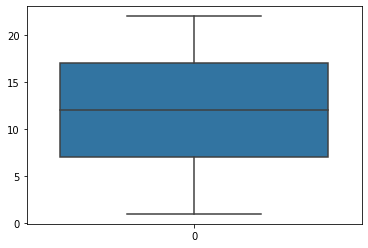

In [ ]:
sns.boxplot(data=stata.hv023)

In [ ]:
stata.columns

Index(['hv005', 'hv021', 'hv023', 'division', 'residence', 'wealth_index',
       'hv105', 'hv115', 'sex', 'education', 'sb307', 'sb308',
       'current_smoking', 'sb323a', 'sb323b', 'sb332a', 'sb332b', 'sb335b',
       'sbbm', 'sb3mos', 'swt', 'systolic_average', 'diastolic_average',
       'hypertension', 'BMI', 'BMI_cat', 'diabetes_measure', 'diabetes',
       'marital_status', 'age_cat', 'occupation'],
      dtype='object')

In [ ]:
stata[['diabetes_measure', 'diabetes']]

,diabetes_measure,diabetes
0,6.2,0.0
1,6.6,1.0
2,6.0,0.0
3,6.5,0.0
4,5.6,0.0
...,...,...
12094,5.7,0.0
12095,6.1,0.0
12096,6.7,1.0
12097,5.4,0.0


### Null values

In [ ]:
stata.isnull().sum()

hv005                    0
hv021                    0
hv023                    0
division                 0
residence                0
wealth_index             0
hv105                    0
hv115                    0
sex                      0
education                0
sb307                    0
sb308                   32
current_smoking          4
sb323a                   0
sb323b                   0
sb332a                   0
sb332b                   0
sb335b                   0
sbbm                   118
sb3mos               11835
swt                      0
systolic_average         0
diastolic_average        0
hypertension             0
BMI                    118
BMI_cat                118
diabetes_measure         0
diabetes                 0
marital_status           0
age_cat                  0
occupation              32
dtype: int64

### Outliers

1. z-score
2. IQR

**Z-score** :     
z=x-mean/std

**IQR**:
focus on 25% to 75%
IQR=(75%-25%)

In [ ]:
for i in stata.columns :
  print(i,'=',stata[i].dtype) 

hv005 = int64
hv021 = int64
hv023 = int64
division = int64
residence = int64
wealth_index = int64
hv105 = int64
hv115 = int64
sex = int64
education = int64
sb307 = int64
sb308 = object
current_smoking = object
sb323a = int64
sb323b = int64
sb332a = int64
sb332b = int64
sb335b = int64
sbbm = object
sb3mos = object
swt = float64
systolic_average = float64
diastolic_average = float64
hypertension = float64
BMI = float64
BMI_cat = float64
diabetes_measure = float64
diabetes = float64
marital_status = int64
age_cat = int64
occupation = object


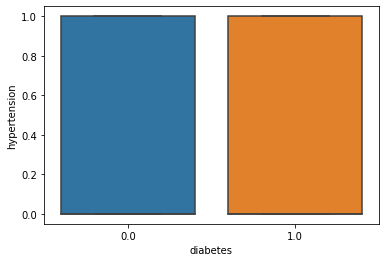

In [ ]:
sns.boxplot(data=stata,x='diabetes',y='hypertension')

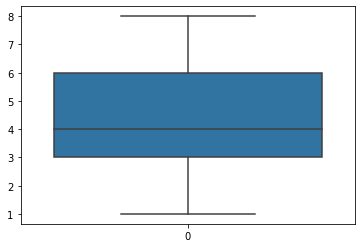

In [ ]:
sns.boxplot(data=stata.division)

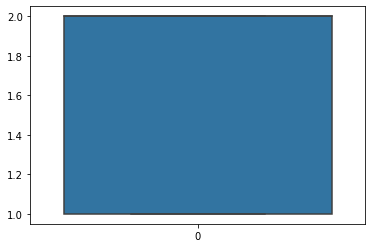

In [ ]:
sns.boxplot(data=stata.residence)

In [ ]:
stata.residence.value_counts()

2    7782
1    4317
Name: residence, dtype: int64

In [ ]:
stata.wealth_index.value_counts()


5    2662
3    2394
1    2379
4    2355
2    2309
Name: wealth_index, dtype: int64

HV105    "Age of household members"

In [ ]:
stata.hv105.unique()

array([25, 34, 35, 55, 45, 42, 39, 71, 61, 32, 21, 76, 24, 65, 49, 27, 75,
       20, 18, 95, 30, 70, 50, 56, 38, 62, 22, 36, 51, 41, 46, 90, 59, 40,
       28, 37, 60, 47, 19, 33, 92, 85, 31, 23, 52, 26, 29, 64, 44, 63, 48,
       54, 43, 74, 67, 73, 79, 57, 80, 68, 58, 53, 72, 69, 82, 87, 66, 78,
       77, 84, 88])

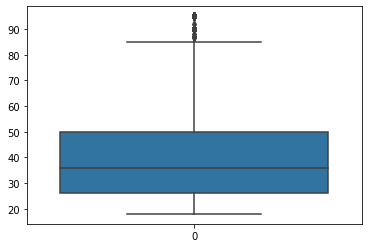

In [ ]:
sns.boxplot(data=stata.hv105)

there are some outliers to remove in hv105


> Indented block



**HV115    "Current marital status"**

In [ ]:
stata.hv115.unique()

array([1, 3, 0, 4])

In [ ]:
stata.columns


Index(['hv005', 'hv021', 'hv023', 'division', 'residence', 'wealth_index',
       'hv105', 'hv115', 'sex', 'education', 'sb307', 'sb308',
       'current_smoking', 'sb323a', 'sb323b', 'sb332a', 'sb332b', 'sb335b',
       'sbbm', 'sb3mos', 'swt', 'systolic_average', 'diastolic_average',
       'hypertension', 'BMI', 'BMI_cat', 'diabetes_measure', 'diabetes',
       'marital_status', 'age_cat', 'occupation'],
      dtype='object')

In [ ]:
stata.sex.value_counts()

2    6888
1    5211
Name: sex, dtype: int64

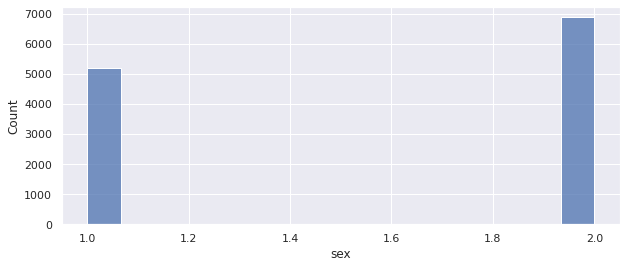

In [ ]:
sns.set(rc={"figure.figsize":(10, 4)})
sns.histplot(data=stata.sex)

the male and female count is balanced

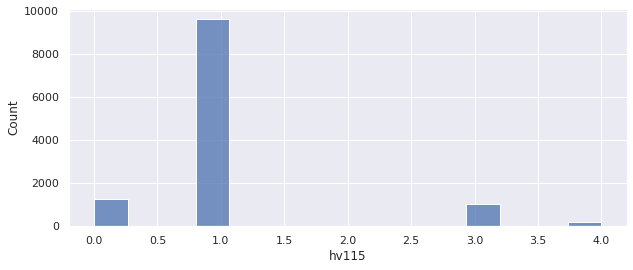

In [ ]:
sns.histplot(data=stata.hv115)

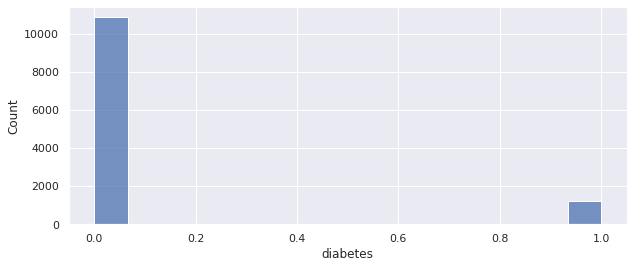

In [ ]:
sns.histplot(data=stata.diabetes)

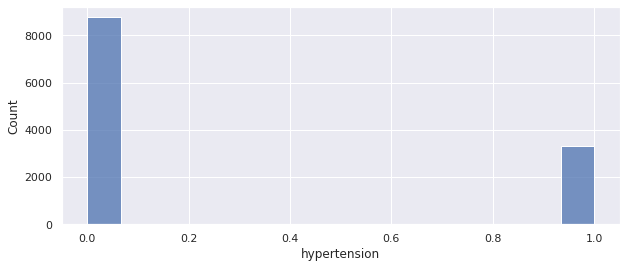

In [ ]:
sns.histplot(data=stata.hypertension)

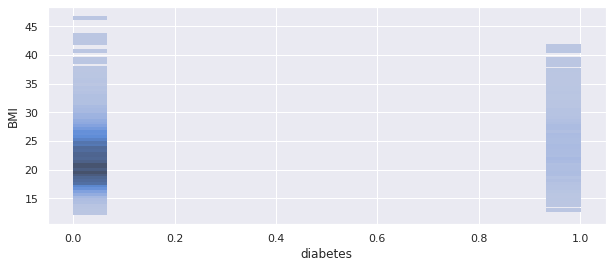

In [ ]:
sns.histplot(x='diabetes',y='BMI',data=stata)


###working with the month of pragnancy

In [ ]:
print('number of male:',stata.loc[stata.sex==1,'sb3mos'].shape[0])

number of male: 5211


In [ ]:
print('number of female:',stata.loc[stata.sex==2,'sb3mos'].shape[0])

number of female: 6888


In [ ]:
prg=stata[~stata.sb3mos.isnull()].shape[0]
prg


264

total number of pregnent women



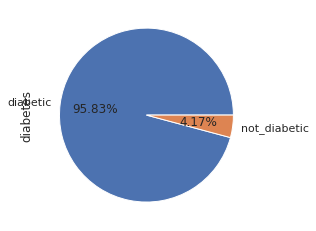

In [ ]:

stata[~stata.sb3mos.isnull()].diabetes.value_counts().plot(kind='pie',autopct='%1.2f%%',labels=['diabetic','not_diabetic'])

diabetes of pregnent women's

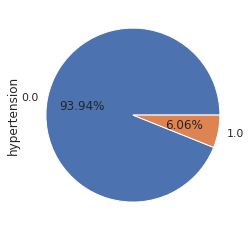

In [ ]:
stata[~stata.sb3mos.isnull()].hypertension.value_counts().plot(kind='pie',autopct='%1.2f%%')

Hypertension of pragnent women

# Data preprocessing

## Data cleaning

### handle the null values

occupation type





In [ ]:
stata.sb308.describe()

count     12067
unique       17
top           0
freq       4749
Name: sb308, dtype: int64

In [ ]:
stata.sb308.fillna(stata.sb308.mode()[0],inplace=True)

In [ ]:
stata.sb308.isnull().sum()

0

"NA - Smoking (cigarettes in last 24 hours)"

In [ ]:
stata.current_smoking.unique()

array([1, 0, nan], dtype=object)

In [ ]:
stata.current_smoking.isnull().sum()

4

In [ ]:
stata.current_smoking.fillna(stata.current_smoking.mode()[0],inplace=True)

In [ ]:
 [print(i,stata[i].isnull().sum()) for i in stata.columns if stata[i].isnull().sum()>0]
  
   

sbbm 118
sb3mos 11835
BMI 118
BMI_cat 118
occupation 32


[None, None, None, None, None]

sbbm "Body mass index for respondent"

In [ ]:
stata.sbbm.describe()

count     11981
unique     1860
top        1977
freq         23
Name: sbbm, dtype: int64

In [ ]:
def mmm(data):
  print('mean=  ',data.mean())
  print('median=  ',data.median())
  print('mode=  ',data.mode()[0])
  

In [ ]:
mmm(stata.sbbm)

mean=   2237.2346214840163
median=   2192.0
mode=   1977


In [ ]:
stata.sbbm.fillna(stata.sbbm.mode()[0],inplace=True)

SB3MOS   "Months of pregnancy"

In [ ]:
stata.sb3mos.fillna(0,inplace=True)

In [ ]:
stata.sb3mos.isnull().sum()

0

BMI


In [ ]:
stata.BMI.fillna(stata.BMI.mean(),inplace=True)

Bmi Category

In [ ]:
stata.BMI_cat.fillna(stata.BMI_cat.median(),inplace=True)

In [ ]:
mmm(stata.occupation)

mean=   1.2864837987900886
median=   1.0
mode=   0


Occupation

In [ ]:
stata.occupation.fillna(stata.occupation.mode()[0],inplace=True)

In [ ]:
stata.isnull().sum()

hv005                0
hv021                0
hv023                0
division             0
residence            0
wealth_index         0
hv105                0
hv115                0
sex                  0
education            0
sb307                0
sb308                0
current_smoking      0
sb323a               0
sb323b               0
sb332a               0
sb332b               0
sb335b               0
sbbm                 0
sb3mos               0
swt                  0
systolic_average     0
diastolic_average    0
hypertension         0
BMI                  0
BMI_cat              0
diabetes_measure     0
diabetes             0
marital_status       0
age_cat              0
occupation           0
dtype: int64

### error,Duplicate

In [ ]:
stata.duplicated().sum()

0

In [ ]:
stata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12099 entries, 0 to 12098
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hv005              12099 non-null  int64  
 1   hv021              12099 non-null  int64  
 2   hv023              12099 non-null  int64  
 3   division           12099 non-null  int64  
 4   residence          12099 non-null  int64  
 5   wealth_index       12099 non-null  int64  
 6   hv105              12099 non-null  int64  
 7   hv115              12099 non-null  int64  
 8   sex                12099 non-null  int64  
 9   education          12099 non-null  int64  
 10  sb307              12099 non-null  int64  
 11  sb308              12099 non-null  int64  
 12  current_smoking    12099 non-null  int64  
 13  sb323a             12099 non-null  int64  
 14  sb323b             12099 non-null  int64  
 15  sb332a             12099 non-null  int64  
 16  sb332b             120

### Removing the outliers

# Feature Engineering

In [ ]:
stata['diabetes']

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
12094    0.0
12095    0.0
12096    1.0
12097    0.0
12098    0.0
Name: diabetes, Length: 12099, dtype: float64

### feature scaling

# Feature Selection

## Working with diabetes 

### train test split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
d_xdata=stata.drop('diabetes',axis=1)
d_ydata=stata['diabetes']

In [ ]:
x_dtrain,x_dtest,y_dtrain,y_dtest=train_test_split(d_xdata,d_ydata,random_state=45,test_size=0.33)

In [ ]:
y_dtrain.head()

4876    0.0
4783    0.0
221     0.0
8069    0.0
8610    0.0
Name: diabetes, dtype: float64

In [ ]:
x_dtrain.head()

,hv005,hv021,hv023,division,residence,wealth_index,hv105,hv115,sex,education,...,swt,systolic_average,diastolic_average,hypertension,BMI,BMI_cat,diabetes_measure,marital_status,age_cat,occupation
4876,1019357,291,12,4,2,4,40,1,1,1,...,1.019357,143.0,100.0,1.0,22.340000,2.0,6.1,2,3,2
4783,1202121,286,12,4,2,4,26,1,1,2,...,1.202121,117.0,83.0,0.0,25.809999,3.0,5.5,2,1,3
221,595998,15,3,1,2,2,95,3,2,0,...,0.595998,104.0,73.5,0.0,23.940001,3.0,5.4,3,8,0
8069,1367590,462,17,6,2,2,22,1,2,2,...,1.367590,120.0,91.0,1.0,23.830000,3.0,4.6,2,1,2
8610,696986,493,16,6,1,3,36,1,2,1,...,0.696986,136.0,93.0,1.0,21.660000,2.0,5.5,2,2,3


### Mutual information of the data

In [ ]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual information
d_mutual_info=mutual_info_classif(x_dtrain,y_dtrain)
d_mutual_info

array([0.00797062, 0.01524629, 0.00577564, 0.0058941 , 0.        ,
       0.01148889, 0.0162804 , 0.01359404, 0.00912111, 0.00546722,
       0.00460465, 0.00090967, 0.        , 0.00341705, 0.00533086,
       0.00909474, 0.00577862, 0.24032084, 0.01059767, 0.        ,
       0.00821992, 0.00622982, 0.00625143, 0.00988843, 0.00924597,
       0.01200645, 0.24014596, 0.00154707, 0.01777873, 0.00343683])

In [ ]:
#convert the data into series
d_mutual_info=pd.Series(d_mutual_info)
d_mutual_info.index=x_dtrain.columns
d_mutual_info.sort_values(ascending=False)


sb335b               0.240321
diabetes_measure     0.240146
age_cat              0.017779
hv105                0.016280
hv021                0.015246
hv115                0.013594
BMI_cat              0.012006
wealth_index         0.011489
sbbm                 0.010598
hypertension         0.009888
BMI                  0.009246
sex                  0.009121
sb332a               0.009095
swt                  0.008220
hv005                0.007971
diastolic_average    0.006251
systolic_average     0.006230
division             0.005894
sb332b               0.005779
hv023                0.005776
education            0.005467
sb323b               0.005331
sb307                0.004605
occupation           0.003437
sb323a               0.003417
marital_status       0.001547
sb308                0.000910
current_smoking      0.000000
sb3mos               0.000000
residence            0.000000
dtype: float64

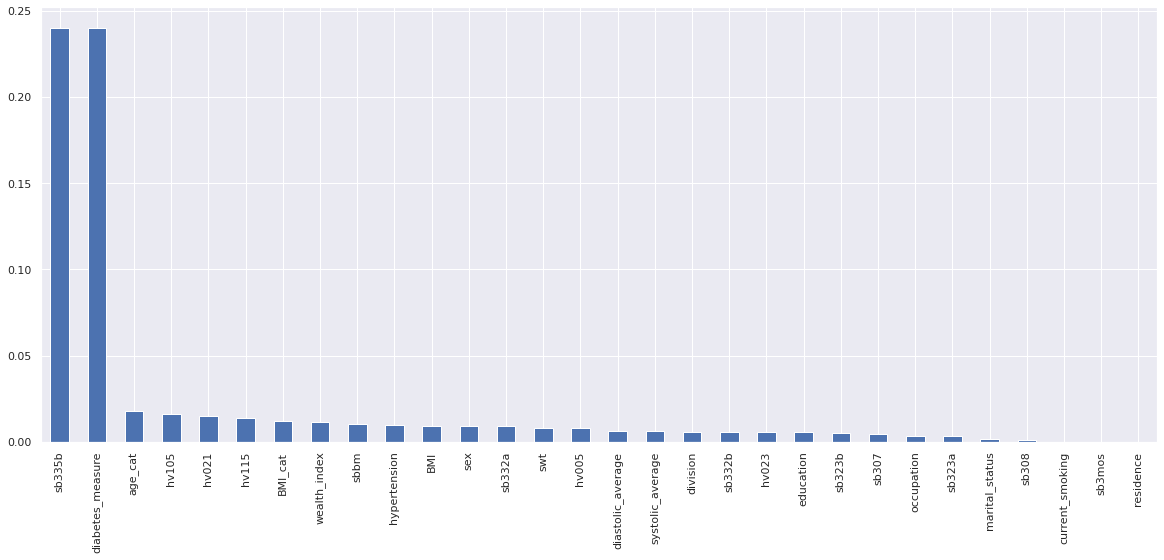

In [ ]:
d_mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))


## Working with hypertention

### train_test split

In [ ]:
h_xdata=stata.drop('hypertension',axis=1)
h_ydata=stata['hypertension']

In [ ]:
x_htrain,x_htest,y_htrain,y_htest=train_test_split(h_xdata,h_ydata,random_state=45,test_size=0.33)

###Mutual information gain for hypertension

In [ ]:
hyper_mutual_info=mutual_info_classif(x_htrain,y_htrain)
hyper_mutual_info

array([0.02280359, 0.01865303, 0.00474702, 0.01016238, 0.00109149,
       0.00879537, 0.07022139, 0.02122767, 0.00165438, 0.00885091,
       0.00144647, 0.        , 0.00517567, 0.29289369, 0.24411894,
       0.28976834, 0.23977377, 0.00808973, 0.02312214, 0.00173824,
       0.01241391, 0.32141561, 0.30316533, 0.02387817, 0.00624908,
       0.00223569, 0.01440933, 0.01717569, 0.06386091, 0.00690662])

In [ ]:
#convert the data into series
hyper_mutual_info=pd.Series(hyper_mutual_info)
hyper_mutual_info.index=x_htrain.columns
hyper_mutual_info.sort_values(ascending=False)


systolic_average     0.321416
diastolic_average    0.303165
sb323a               0.292894
sb332a               0.289768
sb323b               0.244119
sb332b               0.239774
hv105                0.070221
age_cat              0.063861
BMI                  0.023878
sbbm                 0.023122
hv005                0.022804
hv115                0.021228
hv021                0.018653
marital_status       0.017176
diabetes             0.014409
swt                  0.012414
division             0.010162
education            0.008851
wealth_index         0.008795
sb335b               0.008090
occupation           0.006907
BMI_cat              0.006249
current_smoking      0.005176
hv023                0.004747
diabetes_measure     0.002236
sb3mos               0.001738
sex                  0.001654
sb307                0.001446
residence            0.001091
sb308                0.000000
dtype: float64

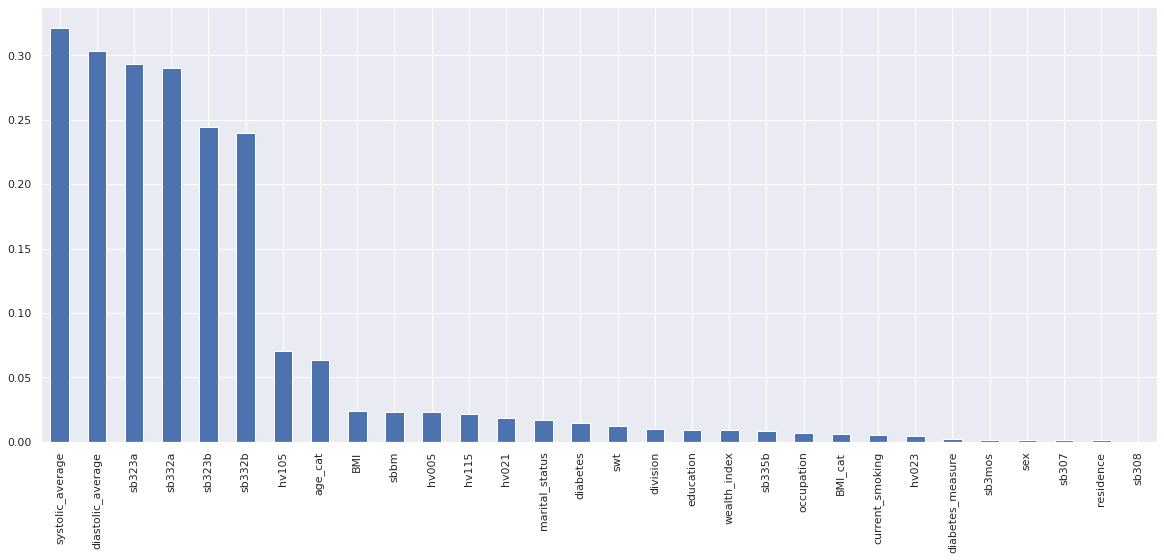

In [ ]:
hyper_mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

## Working with HDC

In [ ]:
#Create a feature of hypertension and diabetes combined!
hdc=np.where((stata['hypertension']==1) & (stata['diabetes']== 1),1,0)

In [ ]:
stata['HDC']=hdc

In [ ]:
stata.HDC.value_counts()

0    11516
1      583
Name: HDC, dtype: int64

In [ ]:
stata[stata['HDC']<=0]

,hv005,hv021,hv023,division,residence,wealth_index,hv105,hv115,sex,education,...,diastolic_average,hypertension,BMI,BMI_cat,diabetes_measure,diabetes,marital_status,age_cat,occupation,HDC
0,671011,1,3,1,2,1,25,1,1,1,...,58.0,0.0,20.549999,2.0,6.2,0.0,2,1,3,0
1,671011,1,3,1,2,1,34,1,2,0,...,66.5,0.0,24.809999,3.0,6.6,1.0,2,1,0,0
2,671011,1,3,1,2,1,35,1,2,1,...,65.5,0.0,17.440001,1.0,6.0,0.0,2,2,0,0
3,671011,1,3,1,2,1,55,1,1,1,...,71.0,0.0,21.080000,2.0,6.5,0.0,2,6,1,0
4,671011,1,3,1,2,1,45,1,2,1,...,93.5,1.0,24.549999,3.0,5.6,0.0,2,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12094,221392,675,20,8,1,5,33,1,2,2,...,96.0,1.0,26.820000,3.0,5.7,0.0,2,1,0,0
12095,221392,675,20,8,1,5,20,0,2,2,...,78.5,0.0,23.889999,3.0,6.1,0.0,1,1,3,0
12096,221392,675,20,8,1,5,62,1,1,2,...,69.0,0.0,21.540001,2.0,6.7,1.0,2,7,3,0
12097,221392,675,20,8,1,5,51,1,2,1,...,79.0,1.0,27.610001,4.0,5.4,0.0,2,5,0,0


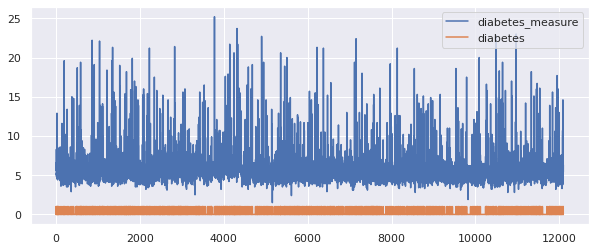

In [ ]:
stata[['diabetes_measure','diabetes']].plot()

## Model implementation

In [ ]:
#import the algorithm from sklearn
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,BaggingClassifier,HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# cart,id3,naive_bayes,random tree classifier,mlp {this are to apply}

### Training the models

In [ ]:
RF=RandomForestClassifier()
Adaboost=AdaBoostClassifier()
ExtraT=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
Bagging=BaggingClassifier()
HistGB=HistGradientBoostingClassifier()
DT=DecisionTreeClassifier()
LR=LogisticRegression()
GNB=GaussianNB()
BNB=BernoulliNB()
MNB=MultinomialNB()
KN=KNeighborsClassifier()
Svm=SVC()

In [ ]:
models = ['RF','Adaboost','ExtraT','GBC','Bagging','HistGB','DT','LR','GNB','BNB','MNB','KN','Svm']

In [ ]:
RF.fit(x_dtrain,y_dtrain)
Adaboost.fit(x_dtrain,y_dtrain)
ExtraT.fit(x_dtrain,y_dtrain)
GBC.fit(x_dtrain,y_dtrain)
Bagging.fit(x_dtrain,y_dtrain)
HistGB.fit(x_dtrain,y_dtrain)
DT.fit(x_dtrain,y_dtrain)
LR.fit(x_dtrain,y_dtrain)
GNB.fit(x_dtrain,y_dtrain)
BNB.fit(x_dtrain,y_dtrain)
MNB.fit(x_dtrain,y_dtrain)
KN.fit(x_dtrain,y_dtrain)
Svm.fit(x_dtrain,y_dtrain)





SVC()

In [ ]:
print('RF = ',RF.score(x_dtest,y_dtest))
print('Adaboost = ',Adaboost.score(x_dtest,y_dtest))
print('ExtraT = ',ExtraT.score(x_dtest,y_dtest))
print('GBC = ',GBC.score(x_dtest,y_dtest))
print('Baggning = ',Bagging.score(x_dtest,y_dtest))
print('HistGB = ',HistGB.score(x_dtest,y_dtest))
print('DT = ',DT.score(x_dtest,y_dtest))
print('LR = ',LR.score(x_dtest,y_dtest))
print('GNB = ',GNB.score(x_dtest,y_dtest))
print('BNB = ',BNB.score(x_dtest,y_dtest))
print('MNB = ',MNB.score(x_dtest,y_dtest))
print('KN = ',KN.score(x_dtest,y_dtest))
print('Svm = ',Svm.score(x_dtest,y_dtest))

RF =  0.9834710743801653
Adaboost =  0.9827197595792637
ExtraT =  0.9699474079639369
GBC =  0.9824693213122965
Baggning =  0.9827197595792637
HistGB =  0.9832206361131981
DT =  0.9639368895567243
LR =  0.8948159278737791
GNB =  0.9166040570999249
BNB =  0.8948159278737791
MNB =  0.6120711244678186
KN =  0.8847983971950915
Svm =  0.8948159278737791


### Evaluating the Models

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(RF, d_xdata,d_ydata, cv=5)

array([0.16033058, 0.98429752, 0.98347107, 0.98140496, 0.98263745])

### Classification report

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
rfpred=RF.predict(x_dtest)

In [ ]:
print(classification_report(y_dtest,rfpred))

In [ ]:
adapred=Adaboost.predict(x_dtest)

In [ ]:
print(classification_report(y_dtest,adapred))

In [ ]:
extrapred=ExtraT.predict(x_dtest)

In [ ]:
print(classification_report(y_dtest,extrapred))